In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

**Цель:** — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Провести разведывательный анализ данных и составить отчёт по его результатам. 

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
stud = pd.read_csv('stud_math.csv')

In [4]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете присутствует:
* 13 числовых столбцов
* 17 строковых столбцов

Рассмотрим все столбцы по отдельности

In [5]:
#находим пустые значения в столбцах
stud.isnull().sum().sort_values(ascending=False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
age                     0
sex                     0
school                  0
dtype: int64

Датафрейм содержит 27 столбцов с пустыми значениями и всего 3 столбца содержат полный набор данных. Напишем функции для замены пустых значений на медиану для числовых столбцов и самое частое значение (моду) для номинативных столбцов

In [6]:
'''функция замены пустых значений на медианные для числовых столбцов
'''


def change_none(stud, columns_list):
    for column in columns_list:
        stud[column] = stud[column].apply(lambda x: stud[column].median()
                                          if pd.isna(x) == True else x)


columns_list = stud.select_dtypes(include='number').columns
change_none(stud, columns_list)

In [7]:
'''функция замены пустых значений на моду для строковых столбцов
'''


def change_none_str(stud, columns_list_str):
    for column in columns_list_str:
        stud[column] = stud[column].apply(lambda x: stud[column].mode()[0]
                                          if pd.isnull(x) else x)


columns_list_str = stud.select_dtypes(exclude='number').columns
change_none_str(stud, columns_list_str)

In [8]:
# проверяем применение функций замены пустых значений:
stud.isnull().sum().sort_values(ascending=False)

score                  0
absences               0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
school                 0
dtype: int64

Построим гистограммы распределения признаков 

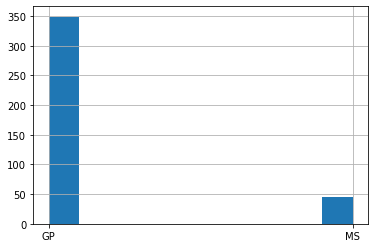

In [9]:
stud.school.hist()

In [10]:
display(pd.DataFrame(stud.school.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.school.value_counts() > 10).sum())
print("Уникальных значений:", stud.school.nunique())

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Большинство учится в школе GP, данный фокт не должен оказывать сильного влияния на результат оценок

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

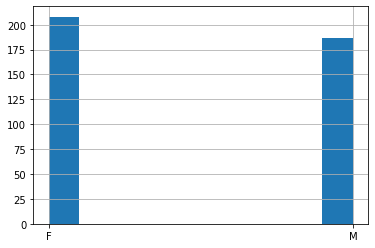

In [11]:
stud.sex.hist()
display(stud.sex.describe())

In [12]:
display(pd.DataFrame(stud.sex.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.sex.value_counts() > 10).sum())
print("Уникальных значений:", stud.sex.nunique())

,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Распределение учеников по половому признаку практически равнозначное (отличие небольшое)

In [13]:
print('Девочек больше, чем мальчиков на', 
      stud.sex.describe()['freq'] - (stud.sex.describe()['count'] - 
                                     stud.sex.describe()['freq']), 
      'человек(а), из',
     stud.sex.describe()['count'], 'учащихся')

Девочек больше, чем мальчиков на 21 человек(а), из 395 учащихся


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

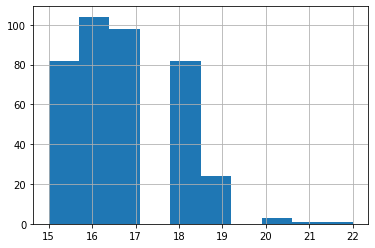

In [14]:
stud.age.sort_values().hist()
display(stud.age.describe())

Есть подозрение на выбросы с возрастом 20-22 года. Мax значение отличается от третьего квантиля более чем на 1,2

Считаем выбросы.

 Воспользуемся формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

[percentile(25) -1.5IQR : percentile(75)+1.5IQR],

где IQR = percentile(75) - percentile(25).

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


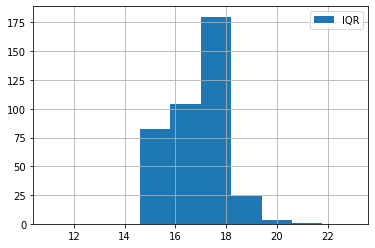

In [15]:
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

stud.age.loc[stud.age.between(perc25 - 1.5*IQR,
                              perc75 + 1.5*IQR)].hist(bins=10,
                                                      range=(11, 23),
                                                      label='IQR')

plt.legend()

Отфильтровываем значения выброса (возраст age=22 - выброс)

In [16]:
display(pd.DataFrame(stud.age.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.age.value_counts() > 10).sum())
print("Уникальных значений:", stud.age.nunique())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 8


Всего 8 категорий возрастов, чаще всего встречаются ученики в возрасте 16 лет

In [17]:
stud = stud.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [18]:
#Проверяем на максимальный возраст
stud.age.max()

21

In [19]:
#Проверяем на минимальный возраст
stud.age.min()

15

Можно сделать вывод, что студент в возрасте 22 лет попал в выборку случайно, либо он уникальный случай

count     394
unique      2
top         U
freq      311
Name: address, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


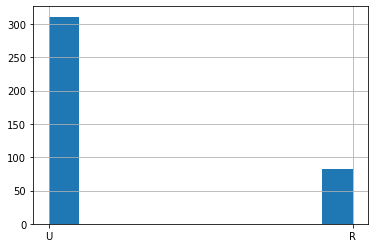

In [20]:
stud.address.hist()
display(stud.address.describe())
stud.loc[:, ['address']].info()

In [21]:
display(pd.DataFrame(stud.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.address.value_counts() > 10).sum())
print("Уникальных значений:", stud.address.nunique())

,address
U,311
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Большинство учеников живет в городе(address = U). 

In [22]:
stud.address.value_counts()

U    311
R     83
Name: address, dtype: int64

GT3    287
LE3    107
Name: famsize, dtype: int64

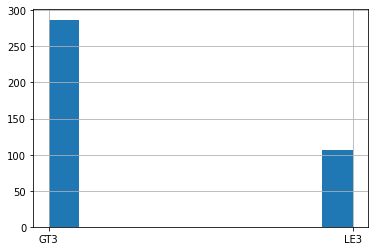

In [23]:
stud.famsize.hist()
stud.famsize.value_counts()

In [24]:
display(pd.DataFrame(stud.famsize.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.famsize.value_counts() > 10).sum())
print("Уникальных значений:", stud.famsize.nunique())

,famsize
GT3,287
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Размер семьи от 4 человек у большинства (GT3 = 287 чел). 

T    358
A     36
Name: Pstatus, dtype: int64

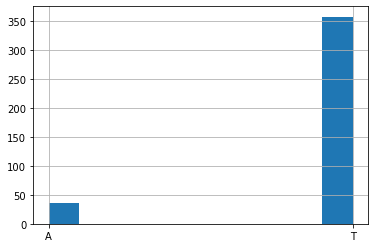

In [25]:
stud.Pstatus.hist()
stud.Pstatus.value_counts()

In [26]:
display(pd.DataFrame(stud.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.Pstatus.value_counts() > 10).sum())
print("Уникальных значений:", stud.Pstatus.nunique())

,Pstatus
T,358
A,36


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


У большинства также родители живут вместе (T = 358 человек)

count    394.000000
mean       2.751269
std        1.095473
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

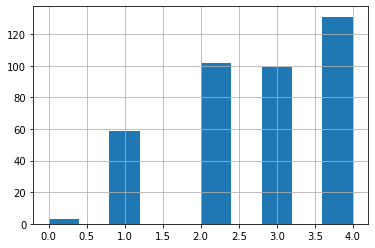

In [27]:
stud.Medu.hist()
display(stud.Medu.describe())

In [28]:
display(pd.DataFrame(stud.Medu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.Medu.value_counts() > 10).sum())
print("Уникальных значений:", stud.Medu.nunique())

,Medu
4.0,131
2.0,102
3.0,99
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5


образование матери в основном составляет высшее, 5-9 классы и среднее специальное (или 11 классов). Выбросов нет, т.к. 0,1,2,3,4 - критерии

count    394.000000
mean       2.581218
std        2.166070
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

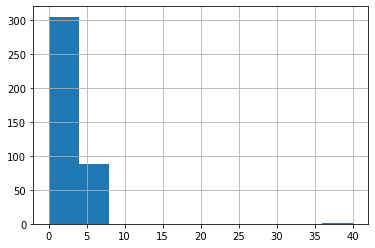

In [29]:
stud.Fedu.hist()
display(stud.Fedu.describe())

для критериев образования отца обнаружен выброс max = 40, такого не может быть, т.к. критериев всего пять (от 0 до 4). Предположение: в данных содержится опечатка, заменим ее на значение равное 4.

In [30]:
stud.Fedu = stud.Fedu.replace(40, 4)

count    394.000000
mean       2.489848
std        1.061061
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

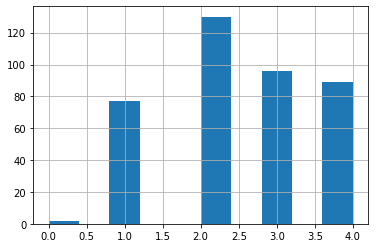

In [31]:
#проверяем еще раз столбец Fedu:
stud.Fedu.hist()
display(stud.Fedu.describe())

In [32]:
display(pd.DataFrame(stud.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.Fedu.value_counts() > 10).sum())
print("Уникальных значений:", stud.Fedu.nunique())

,Fedu
2.0,130
3.0,96
4.0,89
1.0,77
0.0,2


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5


Как видно из графика образование отца в основном составляет 5-9 классы, среднее специальное (или 11 классов) и высшее. Больше всего образования 5-9 классы

other       152
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

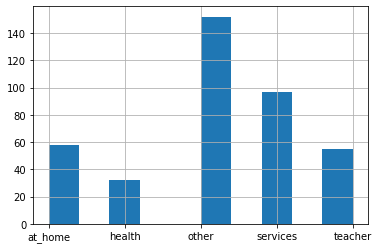

In [33]:
stud.Mjob.hist()
stud.Mjob.value_counts()

In [34]:
display(pd.DataFrame(stud.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.Mjob.value_counts() > 10).sum())
print("Уникальных значений:", stud.Mjob.nunique())

,Mjob
other,152
services,97
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


У матерей в большинстве случаев (other=152) работа НЕ связана с преподаванием, здравоохранением или гос.службой


other       233
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

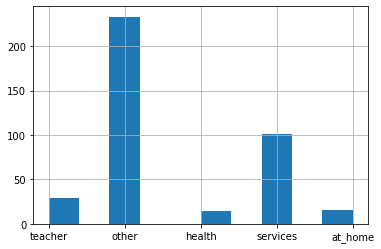

In [35]:
stud.Fjob.hist()
stud.Fjob.value_counts()

In [36]:
display(pd.DataFrame(stud.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.Fjob.value_counts() > 10).sum())
print("Уникальных значений:", stud.Fjob.nunique())

,Fjob
other,233
services,101
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


У подавляющего большинства отцов (other=233) работа НЕ связана с преподаванием, здравоохранением или гос.службой

course        154
home          104
reputation    103
other          33
Name: reason, dtype: int64

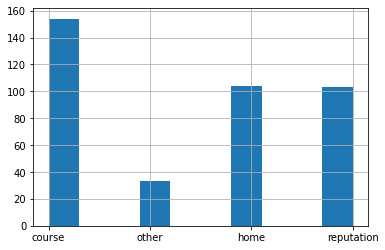

In [37]:
stud.reason.hist()
stud.reason.value_counts()

In [38]:
display(pd.DataFrame(stud.reason.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.reason.value_counts() > 10).sum())
print("Уникальных значений:", stud.reason.nunique())

,reason
course,154
home,104
reputation,103
other,33


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


Основной причиной выбора школы является образовательная программа (course=154)

mother    280
father     86
other      28
Name: guardian, dtype: int64

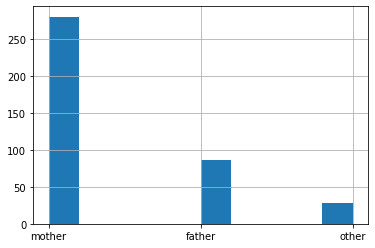

In [39]:
stud.guardian.hist()
stud.guardian.value_counts()

In [40]:
display(pd.DataFrame(stud.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.guardian.value_counts() > 10).sum())
print("Уникальных значений:", stud.guardian.nunique())

,guardian
mother,280
father,86
other,28


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3


У большинства учащихся опекуном является мать (mother=280)

count    394.000000
mean       1.408629
std        0.679040
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

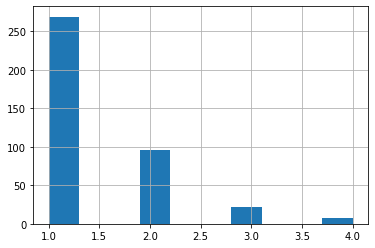

In [41]:
stud.traveltime.hist()
display(stud.traveltime.describe())

In [42]:
display(pd.DataFrame(stud.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.traveltime.value_counts() > 10).sum())
print("Уникальных значений:", stud.traveltime.nunique())

,traveltime
1.0,269
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4


Время в пути до школы обычно составляет <15 мин (traveltime=1), замечены редкие случаи от 30 минут (traveltime=3), выбросами не может являться, т.к. значения от 1 до 4 - критериальные

count    394.000000
mean       2.040609
std        0.833995
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

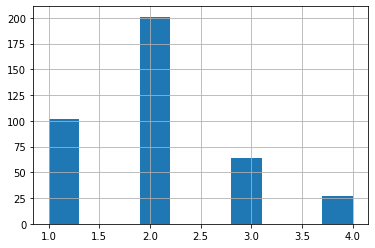

In [43]:
stud.studytime.hist()
display(stud.studytime.describe())

In [44]:
display(pd.DataFrame(stud.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.studytime.value_counts() > 10).sum())
print("Уникальных значений:", stud.studytime.nunique())

,studytime
2.0,201
1.0,102
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


время на учёбу помимо школы в неделю составляет 2-5 часов (studytime = 2), замечены редкие случаи от 5 часов (studytime=3) и выше: выбросами не может являться, т.к. значения от 1 до 4 - критериальные

count    394.000000
mean       0.312183
std        0.714448
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

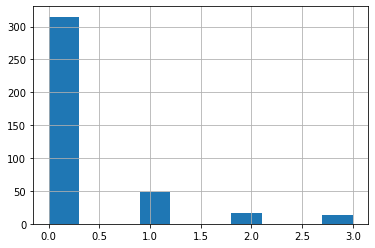

In [45]:
stud.failures.sort_values().hist()
display(stud.failures.describe())

In [46]:
display(pd.DataFrame(stud.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.failures.value_counts() > 10).sum())
print("Уникальных значений:", stud.failures.nunique())

,failures
0.0,315
1.0,49
2.0,16
3.0,14


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


В большинстве случаев у учащихся нет внеучебных неудач (failures=0), редкие случаи неудач **могут быть выбросами**.

Проверяем на выбросы:

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


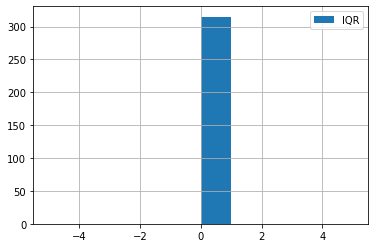

In [47]:
IQR = stud.failures.quantile(0.75) - stud.failures.quantile(0.25)
perc25 = stud.failures.quantile(0.25)
perc75 = stud.failures.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

stud.failures.loc[stud.failures.between(perc25 - 1.5*IQR,
                                        perc75 + 1.5*IQR)].hist(bins=10,
                                                                range=(-5, 5),
                                                                label='IQR')

plt.legend()

выбросы не обозначены, данные оставляем

no     343
yes     51
Name: schoolsup, dtype: int64

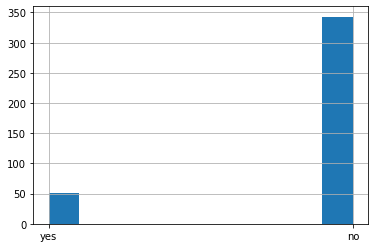

In [48]:
stud.schoolsup.hist()
stud.schoolsup.value_counts()

In [49]:
display(pd.DataFrame(stud.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.schoolsup.value_counts() > 10).sum())
print("Уникальных значений:", stud.schoolsup.nunique())

,schoolsup
no,343
yes,51


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Основная масса учащихся (schoolsup(no)=343) не имеет дополнительную образовательную поддержку

yes    258
no     136
Name: famsup, dtype: int64

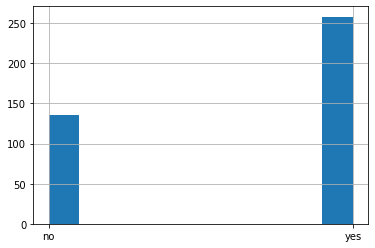

In [50]:
stud.famsup.hist()
stud.famsup.value_counts()

In [51]:
display(pd.DataFrame(stud.famsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.famsup.value_counts() > 10).sum())
print("Уникальных значений:", stud.famsup.nunique())

,famsup
yes,258
no,136


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Чаще всего ученики имеют семейную образовательную поддержку (yes=258).

no     239
yes    155
Name: paid, dtype: int64

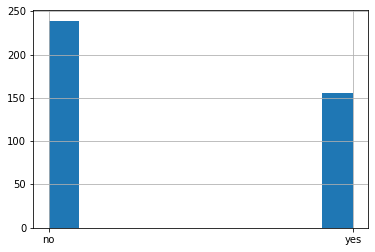

In [52]:
stud.paid.hist()
stud.paid.value_counts()

In [53]:
display(pd.DataFrame(stud.paid.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.paid.value_counts() > 10).sum())
print("Уникальных значений:", stud.paid.nunique())

,paid
no,239
yes,155


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Количество учащихся, не получающих дополнительные платные занятия по математике (no=239), превышает количество тех, кто оплачивает доп. занятия (yes=155) на 84 человека. 

yes    209
no     185
Name: activities, dtype: int64

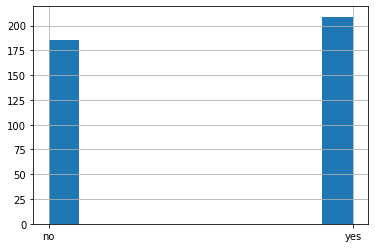

In [54]:
stud.activities.hist()
stud.activities.value_counts()

In [55]:
display(pd.DataFrame(stud.activities.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.activities.value_counts() > 10).sum())
print("Уникальных значений:", stud.activities.nunique())

,activities
yes,209
no,185


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Распределение по дополнительным внеучебным занятиям практически одинаковое, разница составляет всего в 24 человека.

yes    316
no      78
Name: nursery, dtype: int64

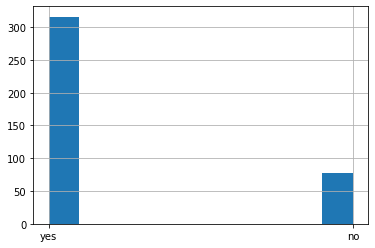

In [56]:
stud.nursery.hist()
stud.nursery.value_counts()

In [57]:
display(pd.DataFrame(stud.nursery.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.nursery.value_counts() > 10).sum())
print("Уникальных значений:", stud.nursery.nunique())

,nursery
yes,316
no,78


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Большая часть учащихся посещало детский сад (yes=316).

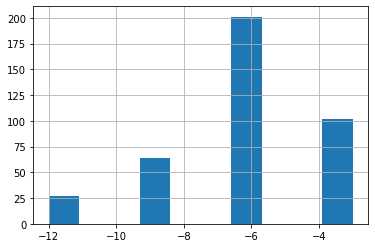

In [58]:
stud['studytime, granular'].hist()

столбец, данные которого пока не удается идентифицировать

yes    376
no      18
Name: higher, dtype: int64

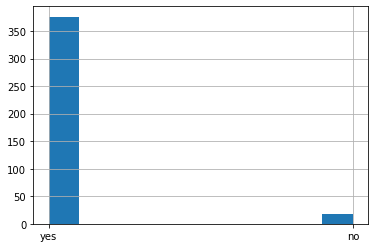

In [59]:
stud.higher.hist()
stud.higher.value_counts()

In [60]:
display(pd.DataFrame(stud.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.higher.value_counts() > 10).sum())
print("Уникальных значений:", stud.higher.nunique())

,higher
yes,376
no,18


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Практически все учащиеся хотят получить высшее образование (yes=376). Нет желания учиться дальше только у 18 человек.

yes    338
no      56
Name: internet, dtype: int64

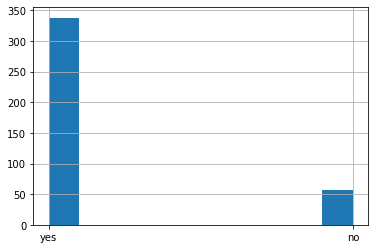

In [61]:
stud.internet.hist()
stud.internet.value_counts()

In [62]:
display(pd.DataFrame(stud.internet.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.internet.value_counts() > 10).sum())
print("Уникальных значений:", stud.internet.nunique())

,internet
yes,338
no,56


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Практически у всех дома есть интернет (yes=338). 

no     271
yes    123
Name: romantic, dtype: int64

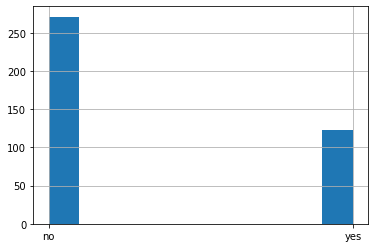

In [63]:
stud.romantic.hist()
stud.romantic.value_counts()

In [64]:
display(pd.DataFrame(stud.romantic.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.romantic.value_counts() > 10).sum())
print("Уникальных значений:", stud.romantic.nunique())

,romantic
no,271
yes,123


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


Большая часть учащихся не отвлекается от учебы, тратя время на романтические отношения (no=271). 

count    394.000000
mean       3.939086
std        0.894624
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

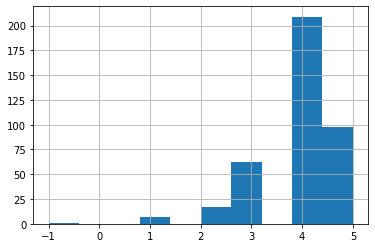

In [65]:
stud.famrel.hist()
display(stud.famrel.describe())

Среди критериев оценки семейных отношений (от 1 - очень плохо до 5 - очень хорошо) на гистограмме найдены показатели с отрицательным значением (-1). можно предположить, что в данных опечатка и значение должно быть равно 1. Исправим опечатку:

In [66]:
stud.famrel = stud.famrel.replace(-1, 1)

count    394.000000
mean       3.944162
std        0.871913
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

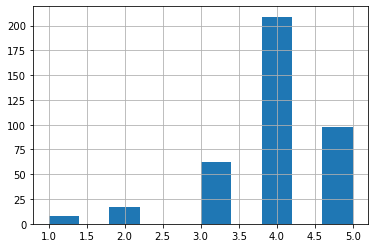

In [67]:
#проверим еще раз распределение famrel

stud.famrel.hist()
display(stud.famrel.describe())

In [68]:
display(pd.DataFrame(stud.famrel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.famrel.value_counts() > 10).sum())
print("Уникальных значений:", stud.famrel.nunique())

,famrel
4.0,209
5.0,98
3.0,62
2.0,17
1.0,8


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5


Критериальные данные теперь отображаются корректно (от 1 до 5), пока что делать выводы о выбросах рано, т.к. значения критериальные, однако основная часть учащихся живет в хороших семейных отношениях (от 4 до 5)

Проверим на выбросы:

25-й перцентиль: 4.0, 75-й перцентиль: 4.0, IQR: 0.0,  Границы выбросов: [4.0, 4.0].


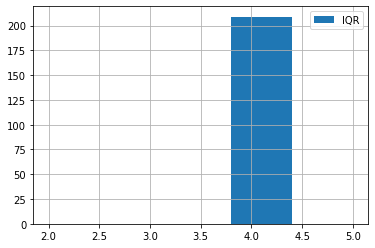

In [69]:
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

stud.famrel.loc[stud.famrel.between(perc25 - 1.5*IQR,
                                    perc75 + 1.5*IQR)].hist(bins=5,
                                                            range=(2, 5),
                                                            label='IQR')

plt.legend()

Показаны выбросы на границе 2.5, оставим эти оценки, т.к. они критериальные

count    394.000000
mean       3.944162
std        0.871913
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

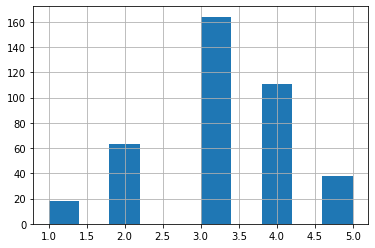

In [70]:
stud.freetime.hist()
display(stud.famrel.describe())

In [71]:
display(pd.DataFrame(stud.freetime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.freetime.value_counts() > 10).sum())
print("Уникальных значений:", stud.freetime.nunique())

,freetime
3.0,164
4.0,111
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


Ученики располагают средним количеством свободного времени после школы. Критерии (от 1 - очень мало до 5 - очень мого)

count    394.000000
mean       3.944162
std        0.871913
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

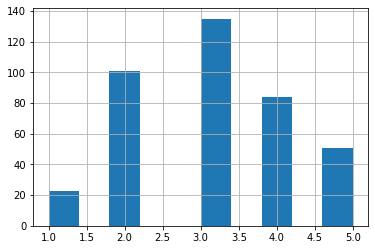

In [72]:
stud.goout.hist()
display(stud.famrel.describe())

In [73]:
display(pd.DataFrame(stud.goout.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.goout.value_counts() > 10).sum())
print("Уникальных значений:", stud.goout.nunique())

,goout
3.0,135
2.0,101
4.0,84
5.0,51
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


В целом, учащиеся проводят среднее количество времени с друзьями
(от 1 - очень мало до 5 - очень много). Около 23 человек проводят очень мало времени с друзьями

count    394.000000
mean       3.555838
std        1.367816
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

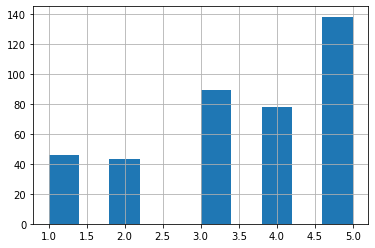

In [74]:
stud.health.hist()
display(stud.health.describe())

In [75]:
display(pd.DataFrame(stud.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.health.value_counts() > 10).sum())
print("Уникальных значений:", stud.health.nunique())

,health
5.0,138
3.0,89
4.0,78
1.0,46
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


Большая часть учащихся не имеют проблем со здоровьем. Критерии - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Однако есть ученики, на состояние здоровья которых следует обратить внимание.

count    394.000000
mean       7.157360
std       23.137065
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

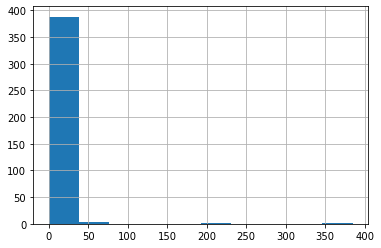

In [76]:
stud.absences.hist()
display(stud.absences.describe())

Проверяем выбросы:

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


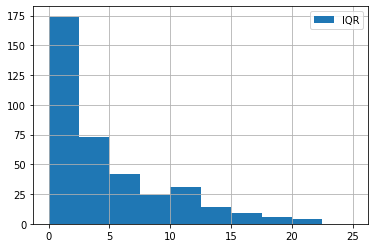

In [77]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR,
                                        perc75 + 1.5*IQR)].hist(bins=10,
                                                                range=(0, 25),
                                                                label='IQR')

plt.legend()

In [78]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [79]:
stud.absences.max()

20.0

In [80]:
display(pd.DataFrame(stud.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.absences.value_counts() > 10).sum())
print("Уникальных значений:", stud.absences.nunique())

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,6


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 21


In [81]:
stud.absences.quantile(0.75)

6.0

По количеству пропущенных занятий **есть выбросы**, т.к. 75% учащихся в основном имеют до 6 пропусков занятий, но встречаются и такие прогульщики, у которых количество пропусков занятий составляет max=385 занятий. Очищаем данные до границы выбросов (верхняя граница выброса=20).

count    377.000000
mean      52.307692
std       22.912432
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

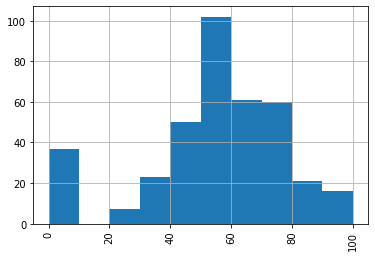

In [82]:
stud.score.sort_values().hist(xrot=90)
display(stud.score.describe())

баллы по госэкзамену по математике (score), судя по гистограмме, **имеют выбросы** среди минимальных значений. Однако, было бы неправильно отсекать минимальные значения, т.к. возможно не все сдавали экзамен или есть учащиеся, действительно получившие низкие баллы

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


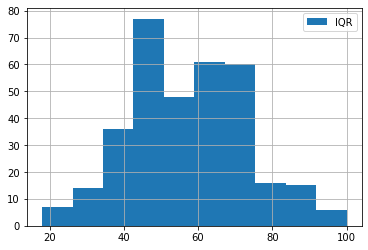

In [83]:
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

stud.score.loc[stud.score.between(perc25 - 1.5*IQR,
                                  perc75 + 1.5*IQR)].hist(bins=10,
                                                          range=(18, 100),
                                                          label='IQR')

plt.legend()

In [84]:
display(pd.DataFrame(stud.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.score.value_counts() > 10).sum())
print("Уникальных значений:", stud.score.nunique())

,score
50.0,54
55.0,48
0.0,37
75.0,33
60.0,31
65.0,30
70.0,27
40.0,27
45.0,23
80.0,16


Значений, встретившихся в столбце более 10 раз: 11
Уникальных значений: 17


In [85]:
'''функция по подсчету количества уникальных значений.
Спасибо Sergey Meshcheryakov за помощь
'''
def uniq_val(stud, num_col):
    for column in num_col:
        values_list = pd.Series(stud[column].value_counts() > 10)
        values_list = sorted(list(values_list[values_list == True].index))
        print('Столбец:', column)
        print("Значений, встретившихся в столбце более 10 раз:",
              (stud[column].value_counts() > 10).sum(), '-', values_list)
        print("Уникальных значений:", stud[column].nunique(), '\n')


In [86]:
#Промежуточный итог: считаем номинативные переменные

num_col = stud.select_dtypes(exclude='number').columns
uniq_val(stud, num_col)

Столбец: school
Значений, встретившихся в столбце более 10 раз: 2 - ['GP', 'MS']
Уникальных значений: 2 

Столбец: sex
Значений, встретившихся в столбце более 10 раз: 2 - ['F', 'M']
Уникальных значений: 2 

Столбец: address
Значений, встретившихся в столбце более 10 раз: 2 - ['R', 'U']
Уникальных значений: 2 

Столбец: famsize
Значений, встретившихся в столбце более 10 раз: 2 - ['GT3', 'LE3']
Уникальных значений: 2 

Столбец: Pstatus
Значений, встретившихся в столбце более 10 раз: 2 - ['A', 'T']
Уникальных значений: 2 

Столбец: Mjob
Значений, встретившихся в столбце более 10 раз: 5 - ['at_home', 'health', 'other', 'services', 'teacher']
Уникальных значений: 5 

Столбец: Fjob
Значений, встретившихся в столбце более 10 раз: 5 - ['at_home', 'health', 'other', 'services', 'teacher']
Уникальных значений: 5 

Столбец: reason
Значений, встретившихся в столбце более 10 раз: 4 - ['course', 'home', 'other', 'reputation']
Уникальных значений: 4 

Столбец: guardian
Значений, встретившихся в столб

Большинство номинативных переменных содержит данные более 10 раз по 2 критериям, думаю, что правильнее будет рассматривать по два наибольших критерия в каждом номинативном столбце

In [87]:
#Промежуточный итог: считаем числовые переменные

num_col = stud.select_dtypes(include='number').columns
uniq_val(stud, num_col)

Столбец: age
Значений, встретившихся в столбце более 10 раз: 5 - [15, 16, 17, 18, 19]
Уникальных значений: 7 

Столбец: Medu
Значений, встретившихся в столбце более 10 раз: 4 - [1.0, 2.0, 3.0, 4.0]
Уникальных значений: 5 

Столбец: Fedu
Значений, встретившихся в столбце более 10 раз: 4 - [1.0, 2.0, 3.0, 4.0]
Уникальных значений: 5 

Столбец: traveltime
Значений, встретившихся в столбце более 10 раз: 3 - [1.0, 2.0, 3.0]
Уникальных значений: 4 

Столбец: studytime
Значений, встретившихся в столбце более 10 раз: 4 - [1.0, 2.0, 3.0, 4.0]
Уникальных значений: 4 

Столбец: failures
Значений, встретившихся в столбце более 10 раз: 4 - [0.0, 1.0, 2.0, 3.0]
Уникальных значений: 4 

Столбец: studytime, granular
Значений, встретившихся в столбце более 10 раз: 4 - [-12.0, -9.0, -6.0, -3.0]
Уникальных значений: 4 

Столбец: famrel
Значений, встретившихся в столбце более 10 раз: 4 - [2.0, 3.0, 4.0, 5.0]
Уникальных значений: 5 

Столбец: freetime
Значений, встретившихся в столбце более 10 раз: 5 - [1.

## Корреляционный анализ количественных переменных

Выясним, какие столбцы коррелируют с оценкой по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

In [88]:
# отбираем столбцы с количественными переменными
num_col = stud.select_dtypes(include='number').columns
num_col

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

Для быстрого построения графиков зависимости переменных воспользуемся функцией pairplot из модуля seaborn

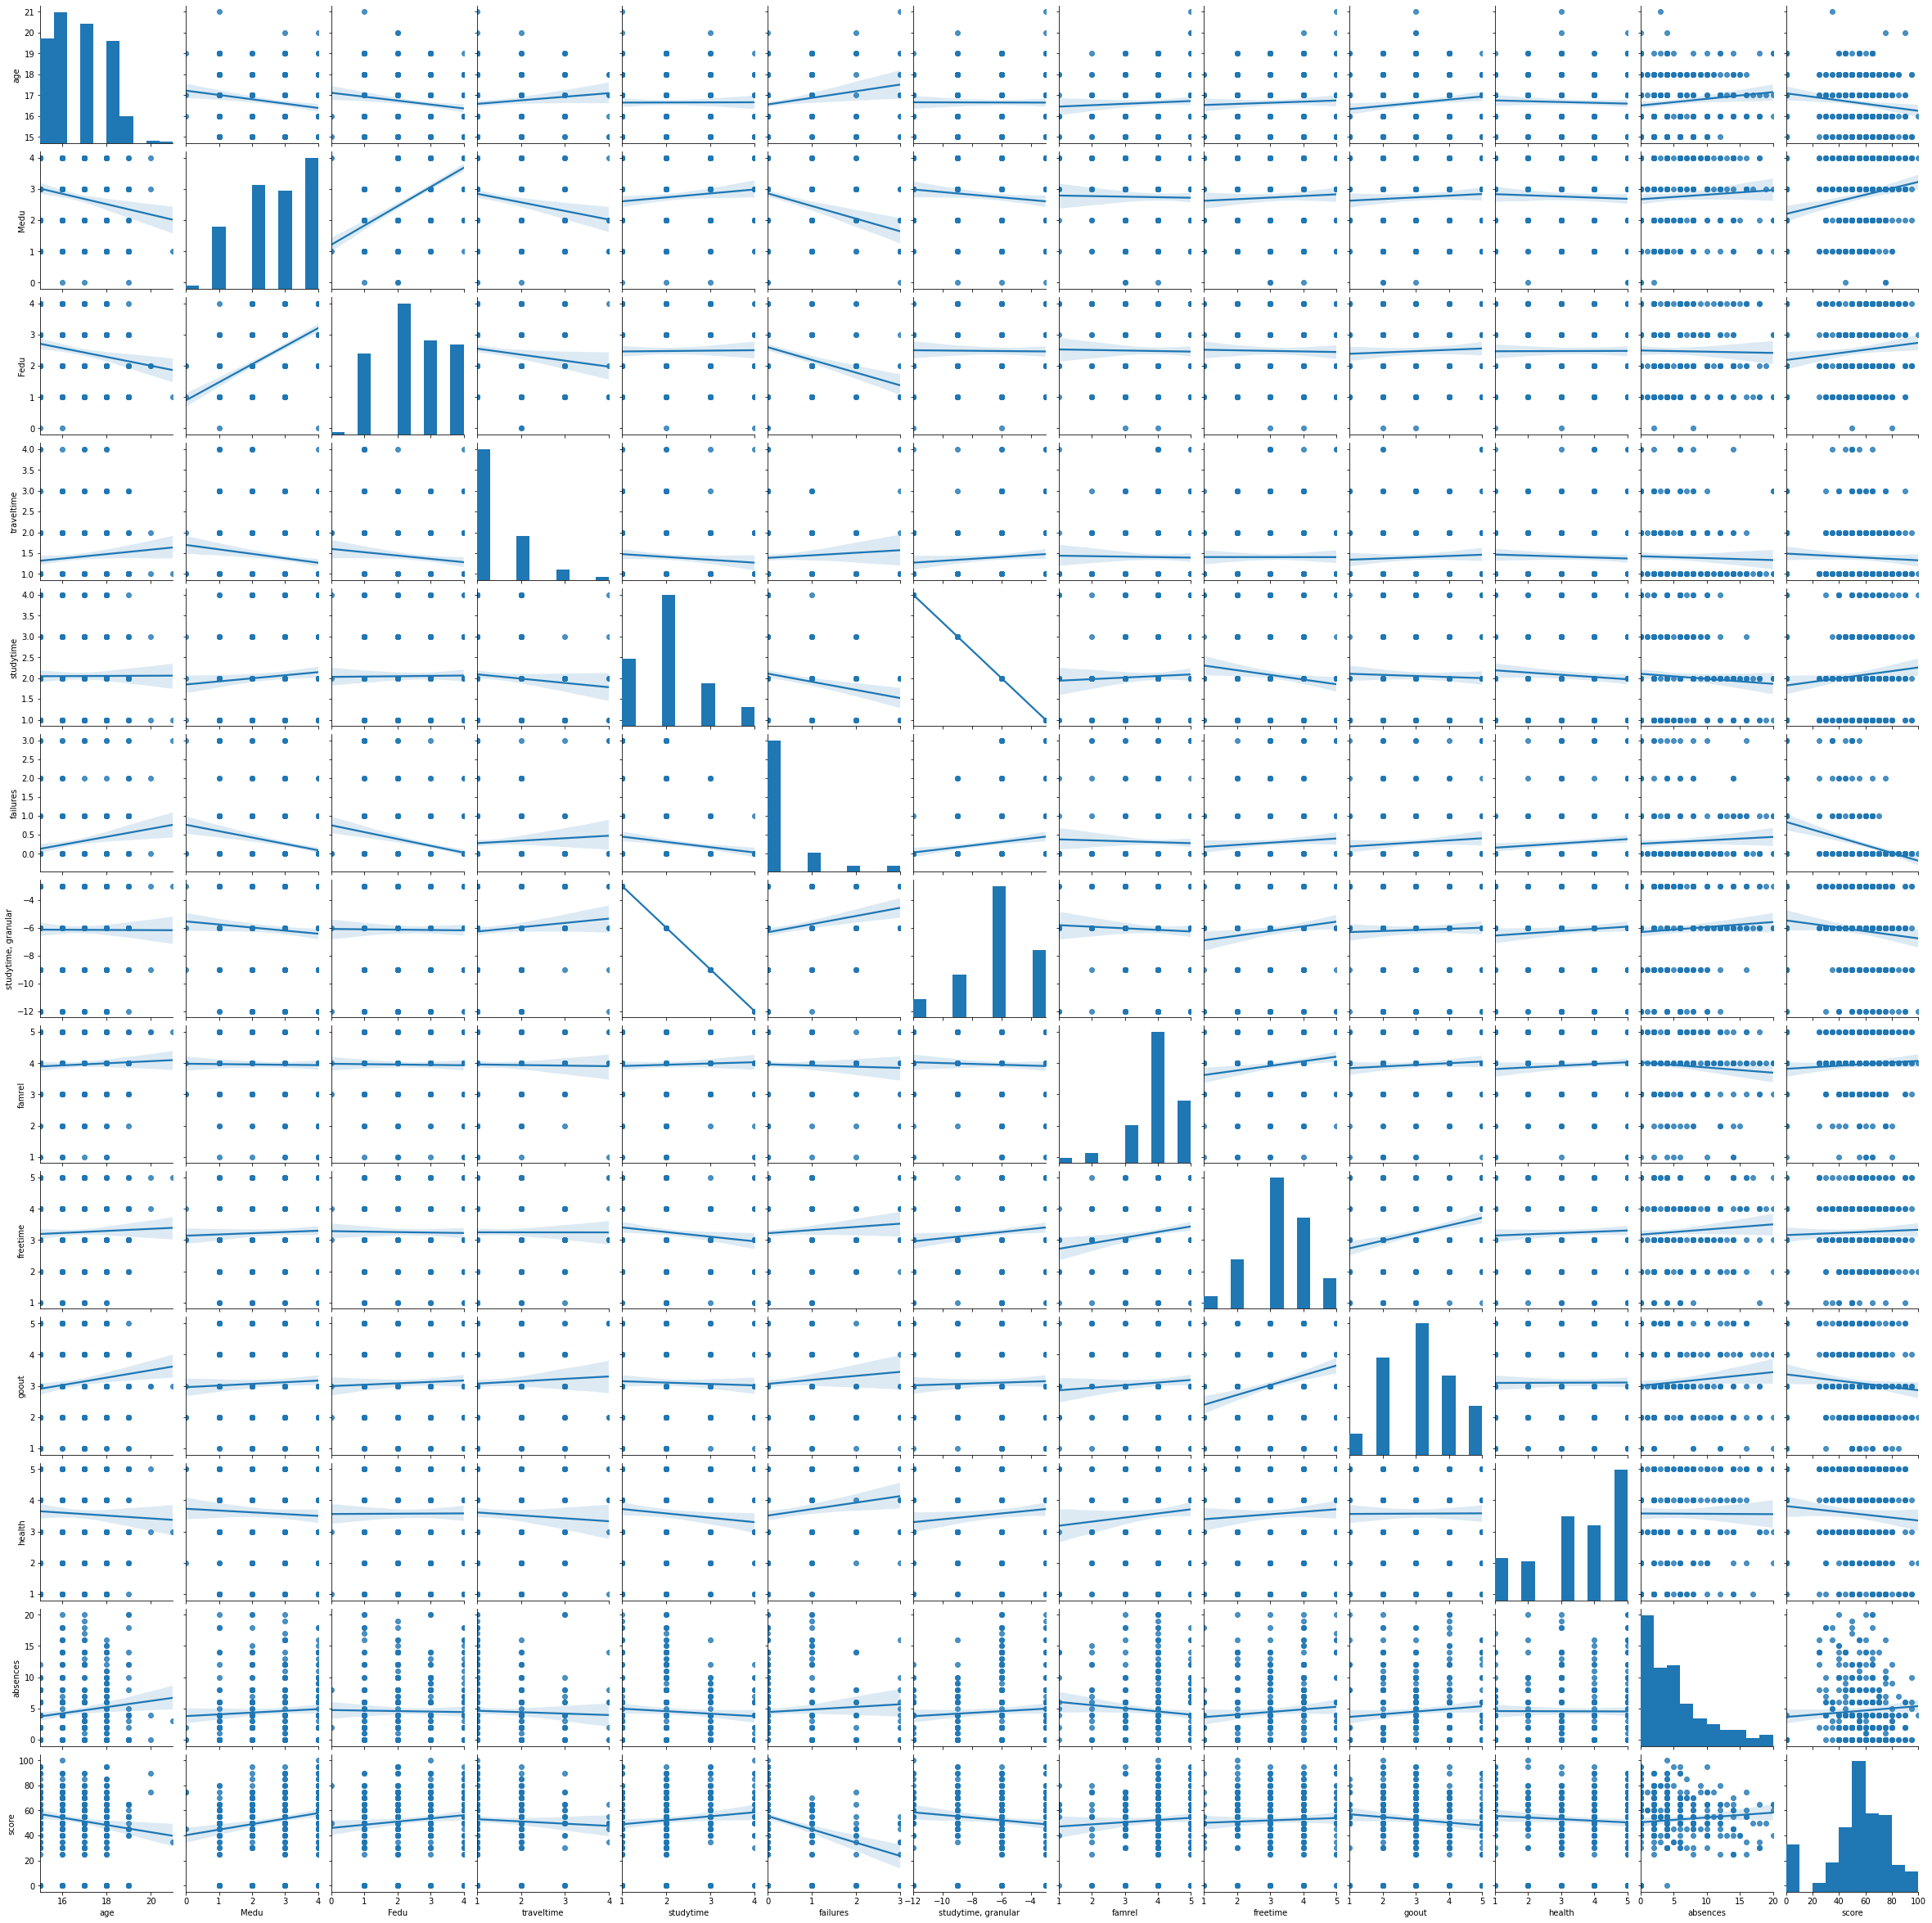

In [89]:
sns.pairplot(stud, kind = 'reg')

На данном графике не очень наглядно. Используем для точности матрицу корреляций.

In [90]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.185715,-0.162145,0.095785,0.003321,0.183434,-0.003321,0.047508,0.041976,0.133867,-0.041651,0.126168,-0.155745
Medu,-0.185715,1.000000,0.596506,-0.172192,0.096700,-0.261547,-0.096700,-0.014015,0.045253,0.053138,-0.046280,0.063991,0.212786
Fedu,-0.162145,0.596506,1.000000,-0.124146,0.010331,-0.271200,-0.010331,-0.014291,-0.016392,0.043224,0.003685,-0.017755,0.118234
traveltime,0.095785,-0.172192,-0.124146,1.000000,-0.084203,0.063751,0.084203,-0.014571,-0.000595,0.048009,-0.047472,-0.032581,-0.053826
studytime,0.003321,0.096700,0.010331,-0.084203,1.000000,-0.165533,-1.000000,0.039320,-0.128670,-0.033993,-0.086519,-0.069485,0.117530
failures,0.183434,-0.261547,-0.271200,0.063751,-0.165533,1.000000,0.165533,-0.030887,0.075332,0.083284,0.108673,0.061214,-0.330653
"studytime, granular",-0.003321,-0.096700,-0.010331,0.084203,-1.000000,0.165533,1.000000,-0.039320,0.128670,0.033993,0.086519,0.069485,-0.117530
famrel,0.047508,-0.014015,-0.014291,-0.014571,0.039320,-0.030887,-0.039320,1.000000,0.162352,0.066266,0.084600,-0.091616,0.066820
freetime,0.041976,0.045253,-0.016392,-0.000595,-0.128670,0.075332,0.128670,0.162352,1.000000,0.276817,0.056804,0.082483,0.040526
goout,0.133867,0.053138,0.043224,0.048009,-0.033993,0.083284,0.033993,0.066266,0.276817,1.000000,0.003971,0.096321,-0.106133


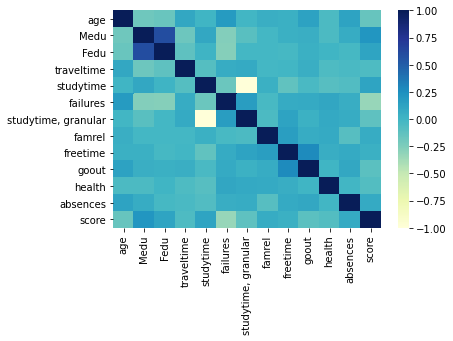

In [91]:
# Дополнительно: для наглядности проверим корреляцию на тепловой карте

sns.heatmap(stud.corr(), cmap="YlGnBu")

In [92]:
stud.corr()['score'].sort_values()

failures              -0.330653
age                   -0.155745
studytime, granular   -0.117530
goout                 -0.106133
health                -0.077493
traveltime            -0.053826
freetime               0.040526
famrel                 0.066820
absences               0.082022
studytime              0.117530
Fedu                   0.118234
Medu                   0.212786
score                  1.000000
Name: score, dtype: float64

При помощи тепловой карты и матрицы корреляции можно наглядно увидеть, что переменные образования родителей Medu и Fedu скоррелированы сильнее остальных. Можно исключить одну из переменных. Допустим, исключим переменную образования отца Fedu.

Менее всего скоррелированы данные (имеют отрицательные значения):
* failures (количество внеучебных неудач)
* age (возраст ученика)
* studytime, granular
* goout (проведение времени с друзьями)
* health (текущее состояние здоровья)
* traveltime (время в пути до школы)

Наибольшее влияние на оценку по математике оказывают такие данные как (по усилению влияния):

* freetime (свободное время после школы)
* famrel (семейные отношения)
* absences (количество пропущенных занятий)
* studytime (время на учёбу помимо школы в неделю)
* Fedu/Medu (образование родителей), причем сильнее всего на оценку влияет из данного набора именно тот факт, какое образование получили родители.


## Анализ номинативных переменных

Проверим, различаются ли распределения оценок в зависимости от значения этих переменных. Для анализа будем использовать box-plot.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [93]:
# Номинативные переменные, которые осталось рассмотреть

num_col = stud.select_dtypes(exclude='number').columns
num_col

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [94]:
# функция для построения box-plot

def get_boxplot(num_col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=num_col, y='score',
                data=stud.loc[stud.loc[:, num_col].
                              isin(stud.loc[:,
                                            num_col].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + num_col)
    plt.show()

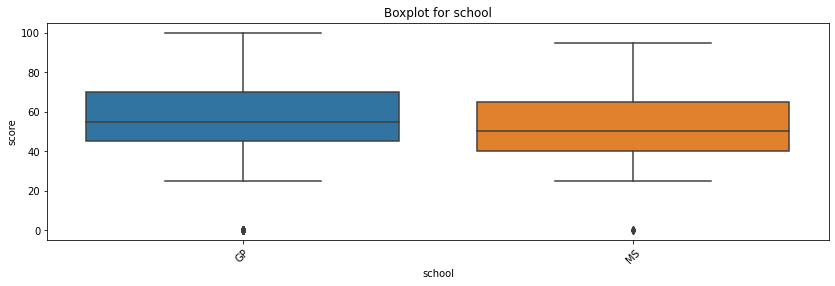

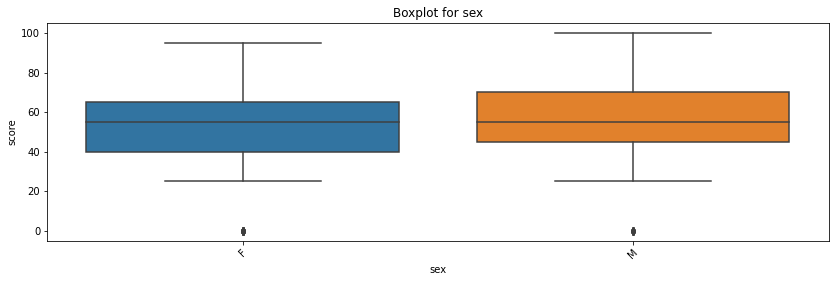

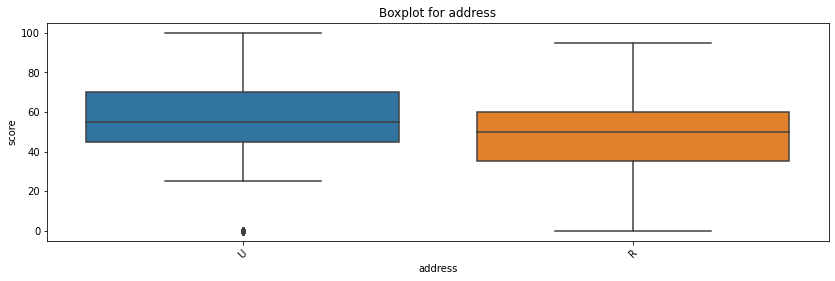

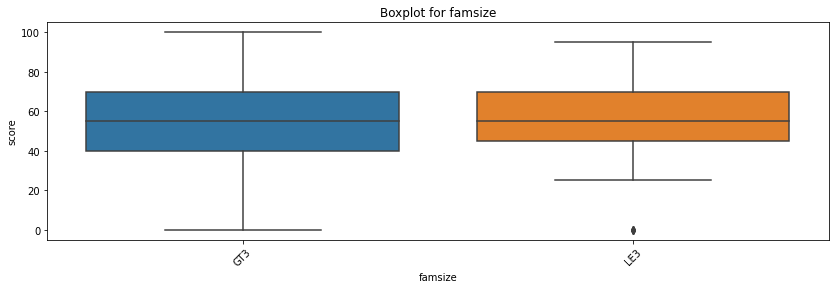

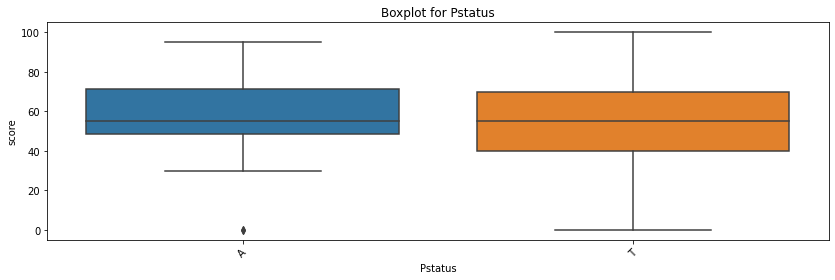

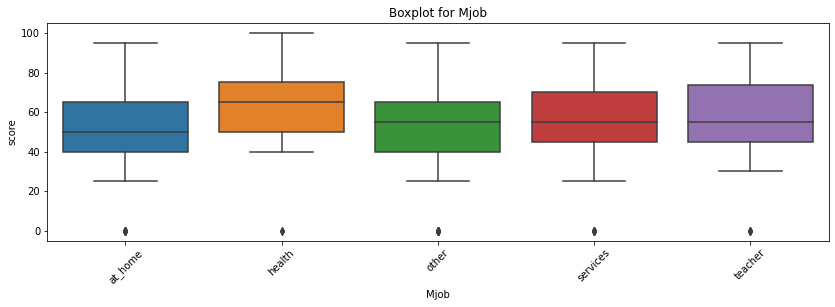

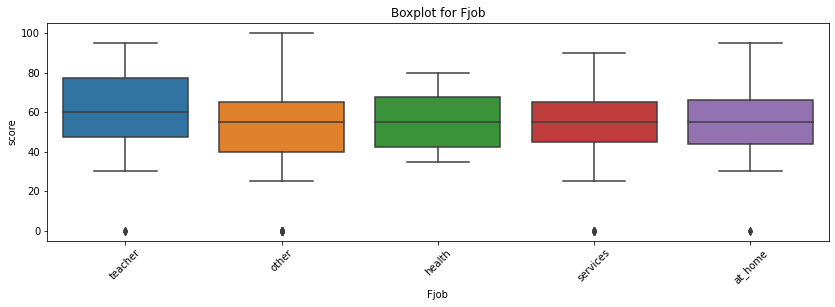

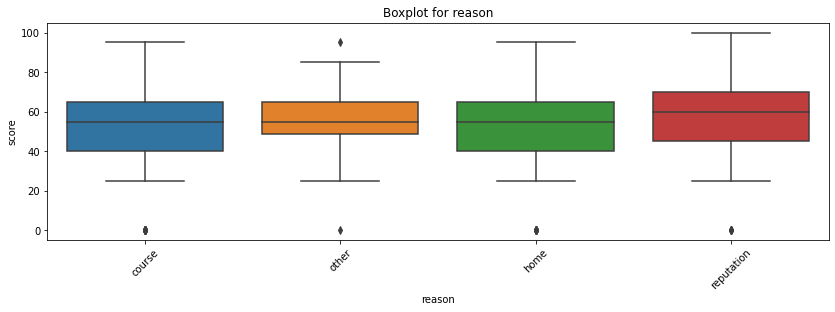

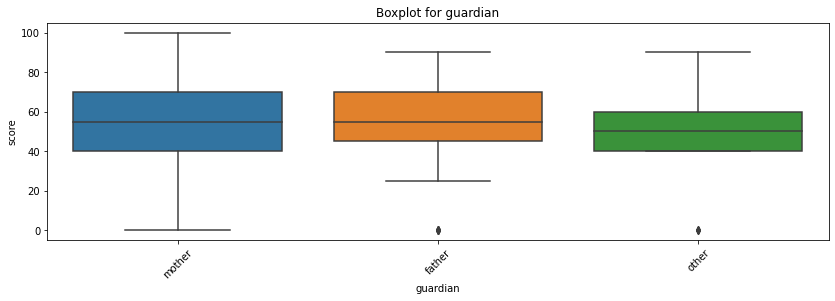

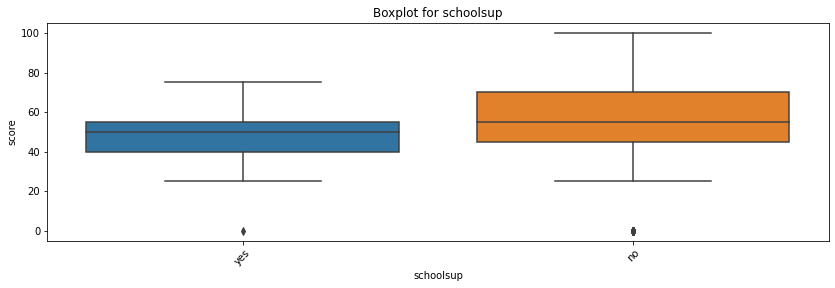

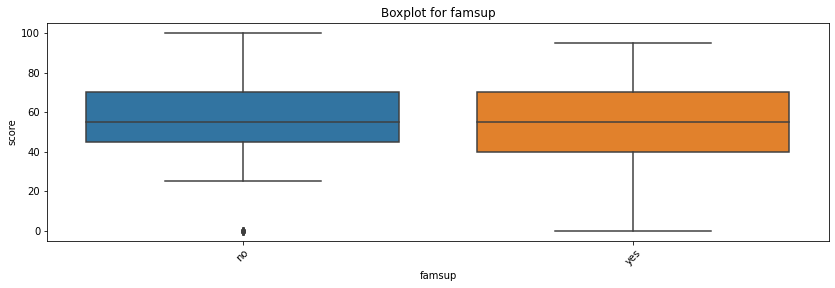

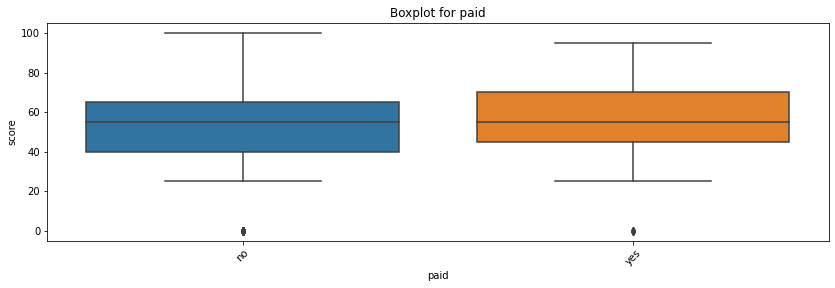

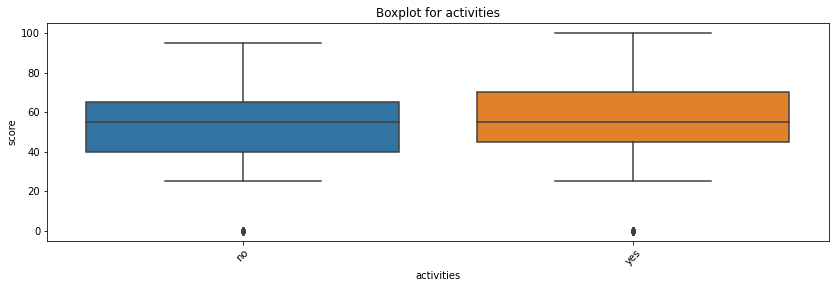

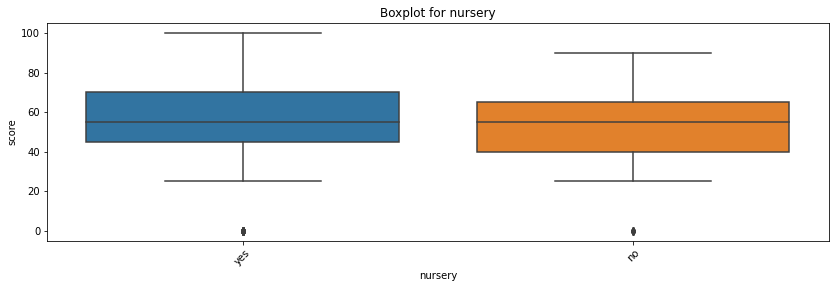

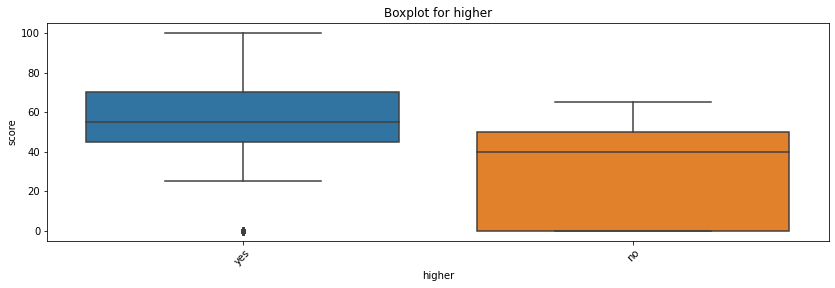

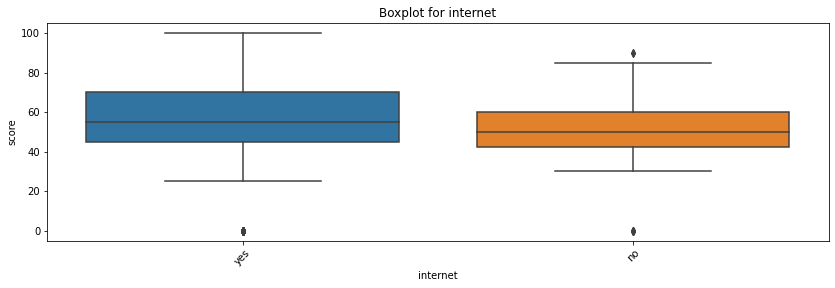

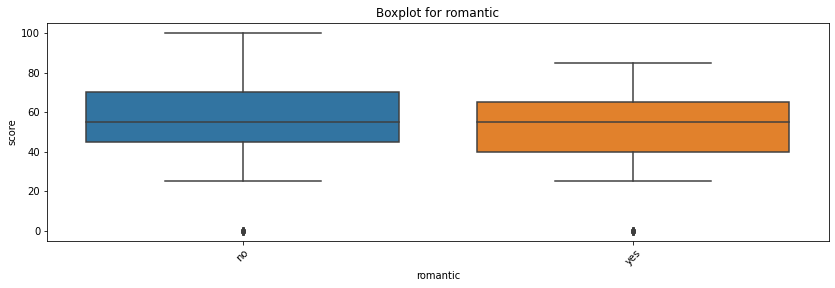

In [95]:
# применяем функцию для построения box-plot:

for col in num_col:
    get_boxplot(col)

Исходя из графиков можно сделать вывод, что влиять на оценку могут параметры:
'school', 'address', 'Mjob', 'Fjob', 'schoolsup', 'higher', 'internet'.
 
Визуально оценка не зависит от параметров 'reason','guardian','sex','famsize','Pstatus',
'famsup','paid','activities','nursery','romantic', т.к. положение их средних величин на графиках неизменно.

Более точный вывод можно получить после расчета. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью **теста Стьюдента.** Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [96]:
def get_stat_dif(num_col):
    cols = stud.loc[:, num_col].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, num_col] == comb[0], 'score'],
                     stud.loc[stud.loc[:, num_col] ==
                              comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',
                  num_col)
            break

In [97]:
for col in num_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как видно из расчета, серьезные отличия содержат параметры: 
* sex (пол ученика), address(тип адреса ученика) 
* address (тип адреса ученика)
* Mjob (работа матери) 
* paid (дополнительные платные занятия по математике) 
* higher (желание получить высшее образование) 
* romantic(в романтических отношениях). 

Данные параметры оставляем для анализа модели. 
Также из ранее выявленных числовых параметров, влияние оказывают:

* freetime (свободное время после школы)
* famrel (семейные отношения)
* absences (количество пропущенных занятий)
* studytime (время на учёбу помимо школы в неделю)
* Fedu/Medu (образование родителей), причем сильнее всего на оценку влияет из данного набора именно тот факт, какое образование получили родители.

основные значимые параметры для модели:

In [98]:
stud_for_model = stud.loc[:, ['sex', 'address', 'Mjob', 'paid', 'higher',
                              'romantic', 'freetime', 'famrel', 'absences',
                              'studytime', 'Fedu', 'Medu']]
stud_for_model.head(20)

,sex,address,Mjob,paid,higher,romantic,freetime,famrel,absences,studytime,Fedu,Medu
0,F,U,at_home,no,yes,no,3.0,4.0,6.0,2.0,4.0,4.0
1,F,U,at_home,no,yes,no,3.0,5.0,4.0,2.0,1.0,1.0
2,F,U,at_home,no,yes,no,3.0,4.0,10.0,2.0,1.0,1.0
3,F,U,health,yes,yes,yes,2.0,3.0,2.0,3.0,2.0,4.0
4,F,U,other,yes,yes,no,3.0,4.0,4.0,2.0,3.0,3.0
5,M,U,services,yes,yes,no,4.0,5.0,10.0,2.0,3.0,4.0
6,M,U,other,no,yes,no,4.0,4.0,0.0,2.0,2.0,2.0
7,F,U,other,no,yes,no,1.0,4.0,6.0,2.0,4.0,4.0
8,M,U,services,yes,yes,no,2.0,4.0,0.0,2.0,2.0,3.0
9,M,U,other,yes,yes,no,5.0,5.0,0.0,2.0,4.0,3.0


# Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

* В данных присутствуют пустые значения, только три столбца из 30 имели полный набор данных. Пропуски в числовых значениях были заменены на медиану, а пропуски в номинативных значениях были заменены на самое частое значение. Однако при заменене на моду итоговые результаты статистической значимости не изменились

* выбросы найдены только в двух столбцах из 30: в столбце age (возраст ученика) и absences(количество пропущенных занятий), из чего можно сделать вывод, что набор данных достаточно чистый

* положительная корреляция параметров Medu и Fedu может говорить о том, что успеваемость ученика по математике во многом зависит от родителей (а точнее от их образования). Любопытно, что в номинативных параметрах также присутсвует зависимость от работы родителей (Mjob и Fjob )

* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это:

freetime (свободное время после школы), \
famrel (семейные отношения), \
absences (количество пропущенных занятий), \
studytime (время на учёбу помимо школы в неделю), \
Fedu, Medu (образование родителей), \
sex (пол ученика), address(тип адреса ученика), \
address (тип адреса ученика), \
Mjob (работа матери), \
paid (дополнительные платные занятия по математике), \
higher (желание получить высшее образование), \
romantic(в романтических отношениях).